Data retrieved for AAPL
Data retrieved for MSFT
Data retrieved for AMZN

Statistics of Collected Stock Data:


,Open,High,Low,Close,Volume
count,300.000000,300.000000,300.000000,300.00000,3.000000e+02
mean,285.521440,289.112627,282.301093,285.99680,4.088186e+07
std,91.682608,92.097917,91.290500,91.76031,2.466958e+07
min,162.000000,178.143600,161.380000,170.66000,7.164543e+06
25%,221.236250,223.777500,218.692500,220.81250,2.421872e+07
50%,235.480000,239.454950,233.625050,236.97000,3.618708e+07
75%,392.403750,394.927500,386.258750,390.75000,4.808935e+07
max,451.320000,456.164800,449.570000,454.46000,1.843959e+08


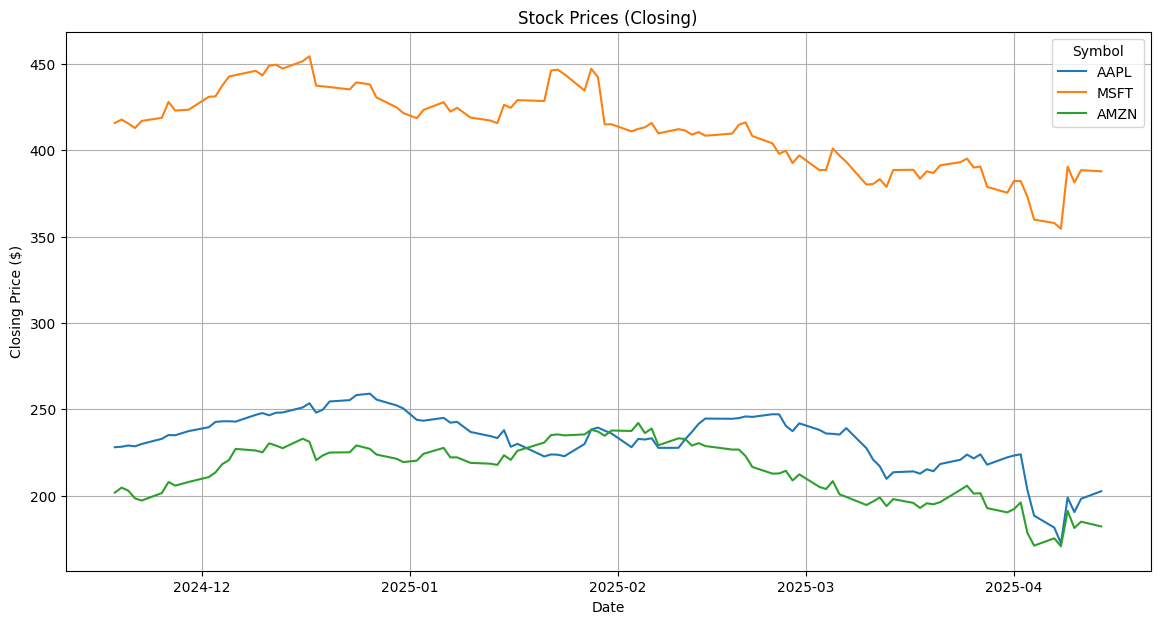

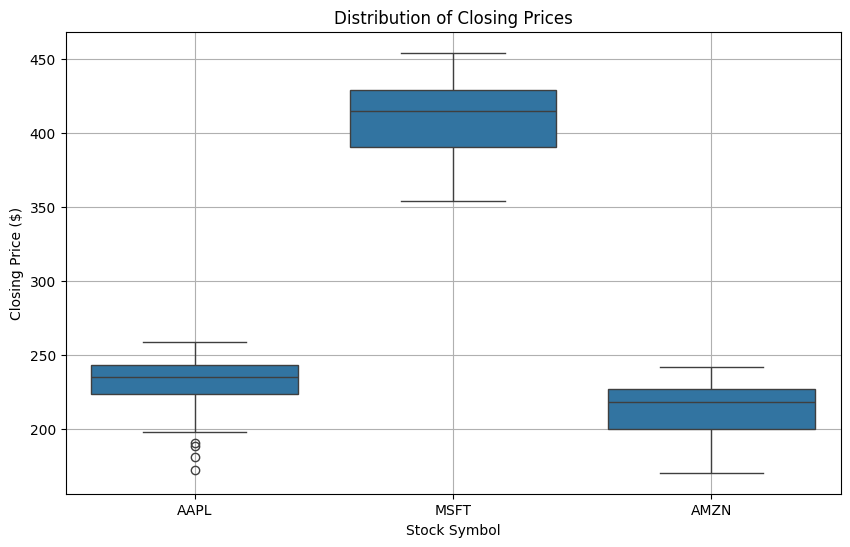


Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
Symbol,,,,,,,,
AAPL,100.0,232.0239,16.568104,172.42,223.7275,235.195,243.4825,259.02
AMZN,100.0,213.7671,17.331531,170.66,200.3375,218.310,227.4975,242.06
MSFT,100.0,412.1994,23.553701,354.56,391.0900,415.025,429.4050,454.46



Exchange rates retrieved successfully.


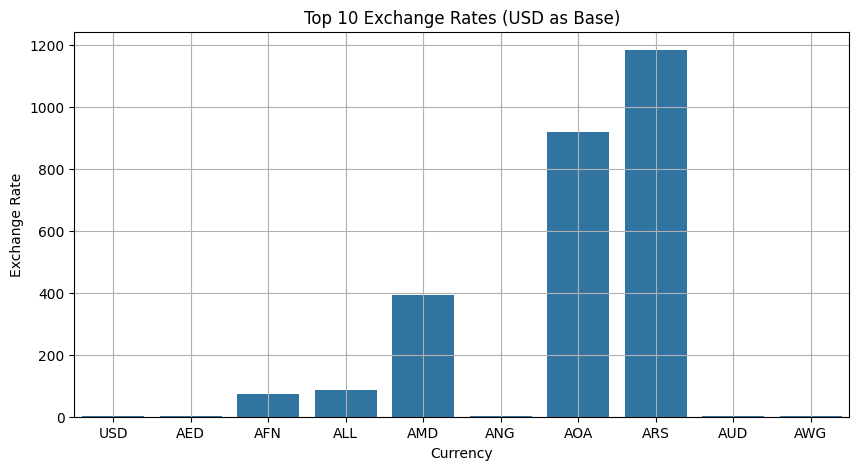


Exchange Rate Statistics:


,Exchange Rate
count,163.000000
mean,1941.082682
std,8506.902575
min,0.306751
25%,3.338092
50%,24.000000
75%,204.920331
max,89500.000000


In [1]:
# Install necessary libraries (quietly)
!pip install requests pandas matplotlib seaborn --quiet

# Import libraries for HTTP requests, data manipulation, and visualization
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

#-------------------------------
# Example 1: Fetching Stock Data
#-------------------------------

# API key for accessing Alpha Vantage API (replace with your own)
API_KEY = '003LNB7GX6QL9TY2'

# List of stock symbols to retrieve data for
stocks = ['AAPL', 'MSFT', 'AMZN']

# Base URL for Alpha Vantage API requests
base_url = 'https://www.alphavantage.co/query'

# Initialize an empty DataFrame to store stock data
stock_data = pd.DataFrame()

# Loop over each stock symbol to fetch its data
for symbol in stocks:
    # Set parameters for the API request (daily time series data)
    params = {'function': 'TIME_SERIES_DAILY', 'symbol': symbol, 'apikey': API_KEY}

    # Make the API request and parse the response as JSON
    response = requests.get(base_url, params=params).json()

    # Check if the response contains the daily time series data
    if 'Time Series (Daily)' in response:
        # Convert JSON data into a pandas DataFrame
        df = pd.DataFrame(response['Time Series (Daily)']).T.astype(float)

        # Convert index to datetime format for better manipulation
        df.index = pd.to_datetime(df.index)

        # Rename columns to more understandable labels
        df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

        # Add a new column with the stock symbol for easier identification
        df['Symbol'] = symbol

        # Concatenate data for the current stock to the main DataFrame
        stock_data = pd.concat([stock_data, df])

        # Inform user that data retrieval was successful
        print(f"Data retrieved for {symbol}")
    else:
        # Handle potential errors or API rate limit issues
        print(f"Error retrieving {symbol}: {response.get('Note', '')}")
        # Wait before the next request to avoid rate limiting
        time.sleep(60)
        continue

    # Brief pause to respect API rate limits (Alpha Vantage allows 5 calls/min)
    time.sleep(12)

# Display basic statistical summary of all retrieved stock data
print("\nStatistics of Collected Stock Data:")
display(stock_data.describe())

# Plot the closing prices of the stocks over time
plt.figure(figsize=(14,7))
sns.lineplot(data=stock_data.reset_index(), x='index', y='Close', hue='Symbol')
plt.title('Stock Prices (Closing)')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.grid(True)
plt.show()

# Visualize the distribution of closing prices for each stock symbol
plt.figure(figsize=(10,6))
sns.boxplot(data=stock_data, x='Symbol', y='Close')
plt.title('Distribution of Closing Prices')
plt.xlabel('Stock Symbol')
plt.ylabel('Closing Price ($)')
plt.grid(True)
plt.show()

# Display descriptive statistics grouped by stock symbol
print("\nDescriptive Statistics:")
display(stock_data.groupby('Symbol')['Close'].describe())

#---------------------------------------
# Example 2: Fetching Currency Exchange Rates
#---------------------------------------

# URL for retrieving current exchange rates with USD as the base currency
exchange_api_url = 'https://open.er-api.com/v6/latest/USD'

# Make a request and parse JSON response
response = requests.get(exchange_api_url).json()

# Check if the request was successful
if response['result'] == 'success':
    # Convert exchange rates from JSON to pandas DataFrame
    exchange_rates = pd.DataFrame(response['rates'].items(), columns=['Currency', 'Exchange Rate'])
    print("\nExchange rates retrieved successfully.")
else:
    # Inform the user about any retrieval issues
    print("Error retrieving exchange rates")

# Select the top 10 exchange rates for visualization
exchange_rates_top_10 = exchange_rates.head(10)

# Plot the top 10 currency exchange rates against USD
plt.figure(figsize=(10,5))
sns.barplot(data=exchange_rates_top_10, x='Currency', y='Exchange Rate')
plt.title('Top 10 Exchange Rates (USD as Base)')
plt.ylabel('Exchange Rate')
plt.xlabel('Currency')
plt.grid(True)
plt.show()

# Display statistical summary of the exchange rates
print("\nExchange Rate Statistics:")
display(exchange_rates['Exchange Rate'].describe())
